In [58]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from scipy import optimize
from scipy import io
from numpy import ndarray
import mpld3
mpld3.enable_notebook()
sc

In [2]:
def solveFgivenS (Y, P0, S, motion = None):
    def P (frame):
        return P0

    #S is the concatenation [Sk Su]
    F = np.zeros((S.shape[1], Y.shape[1]))
    for frame in range(0,Y.shape[1]):
        PS = P(frame).dot(S).toarray()
        x, resid = optimize.nnls(PS,Y[:,frame])
        F[:,frame] = x
        #ret = lsqlin.lsqnonneg(PS, Y, {'show_progress': False})
        #F[:, frame] = ret['x']
    return F

In [34]:
def solveFgivenS_vec (Y, P0, S, motion = None, frame = 0):
    def P (frame):
        return P0

    #S is the concatenation [Sk Su]
    PS = P(frame).dot(S).toarray()
    x, resid = optimize.nnls(PS,Y.T)
    F= x
        #ret = lsqlin.lsqnonneg(PS, Y, {'show_progress': False})
        #F[:, frame] = ret['x']
    return F

In [54]:
fn = './Problem_nonoise_v1.mat'

D = io.loadmat(fn, struct_as_record=False, squeeze_me=True)
Y = D['obs'].data_in

Y = Y[:,0:10]
frames = sc.parallelize(Y.T)

obs = D['obs']
opts = D['opts']

#Y = obs.data_in
P0 = opts.P.T  # transpose
S = D['S_init']

mapped = frames.map(lambda f: solveFgivenS_vec(f, P0, S))
result = mapped.collect()
result
#frames.first().shape

[array([  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   1.05484067,  11.66495422,
          0.        ,  10.08132822,   3.85933077,   1.17239017,
          1.22909718,   1.97143957,   0.93291826,   1.04607305,
          2.77023399,   0.        ,   0.72111703,   1.86060372,
          9.44204726,  10.75935023,   0.21516447,   9.07505146,
         11.33345237,   0.76460666,   2.6599541 ,   3.0934015 ,
         12.10627497,  10.98165931,  18.28358515,   0.5631307 ,
          0.        ,   2.93727506,  11.

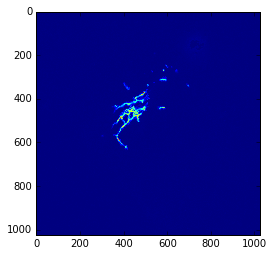

In [61]:
#reconstruct image

IM = S.dot(result[0])
IM = np.reshape(IM, (1024, 1024))

plt.imshow(IM)
plt.show()



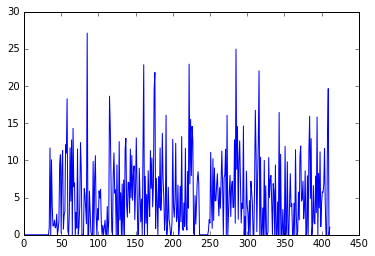

In [68]:
#reconstruct ground truth
#groundtruth = D['ground_truth']
F = result
F2 = D['F_init']

plt.plot(result[0])
plt.plot(F2[:,0])
plt.show()
#recon_gt = ndarray.reshape(groundtruth.IM, (-1,1)) + groundtruth.Su.dot(groundtruth.Fu[:,tidx[0:maxind-1]]) + groundtruth.seg.dot(groundtruth.activity[:,tidx[0:maxind-1]])

In [52]:
F = solveFgivenS_vec(Y[:,1], P0, S)

In [63]:
print result[0].shape

(412,)


In [53]:
print F.shape

(412,)


In [28]:
print F

[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [ 19.64706517   4.67887661   0.         ...,   3.79203754   1.46013972
    8.12464368]
 [  0.          10.0079601    2.33536042 ...,   6.54629447   1.71226276
    4.33095523]
 [  1.00278312   1.00975173   1.01083269 ...,   1.0051974    1.01030158
    1.00556197]]
